In [ ]:
importamos las librerias:

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from unidecode import unidecode
import re
import time


import warnings
import nltk

# Ignorar las advertencias
warnings.filterwarnings('ignore')

# Descargar recursos necesarios de NLTK
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Funciones de nltk
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

#Red neuronal
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix




# Gráficos
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

from collections import Counter
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ryzen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ryzen\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ryzen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
lectura de archivo con los datos:

In [2]:
ruta_Archivo = './train_new.txt'

df = pd.read_csv(ruta_Archivo,encoding='ISO-8859-1',sep='|')
df.columns = ["Lenguage", "Text"]

In [ ]:
Limpieza de datos:

In [4]:
def limpiar_tokenizar(lang, texto):
    lemmatizer = WordNetLemmatizer()
    # Convertir a minúsculas
    RefactorText = texto.lower()
    # Remover caracteres de puntuación y otros caracteres no deseados
    regex = r'[^\w\s]'
    RefactorText = re.sub(regex, ' ', RefactorText)
    # Remover números
    RefactorText = re.sub("\d+", ' ', RefactorText)
    # Remover espacios adicionales
    RefactorText = re.sub("\\s+", ' ', RefactorText)
    # Eliminar acentos y caracteres especiales
    RefactorText = unidecode(RefactorText)
    # Remover fechas en formato "dd/mm/aaaa" y "dd/mm/aa"
    RefactorText = re.sub("\d+/\d+", ' ', RefactorText)
    RefactorText = re.sub("\d{1,2}/\d{1,2}/\d{2,4}", ' ', RefactorText)
    # Tokenizar el texto
    RefactorText = RefactorText.split(sep=' ')
    # Lematizar las palabras
    RefactorText = [lemmatizer.lemmatize(token) for token in RefactorText]
    # Filtrar palabras con longitud mayor a 1
    RefactorText = [token for token in RefactorText if len(token) > 1]
    return RefactorText

In [ ]:
Tokenizacion y vectorizacion de datos:

In [5]:
df['texto_tokenizado'] = df.apply(lambda x: limpiar_tokenizar(x['Lenguage'], x['Text']), axis=1)
df.to_csv('resultadoTokeniz.csv', index=False)

texto_tidy = df.explode(column='texto_tokenizado')
texto_tidy = texto_tidy.drop(columns='Text')
texto_tidy = texto_tidy.rename(columns={'texto_tokenizado': 'token'})
texto_tidy.head(10)

# Especificar la ruta del archivo CSV
ruta_archivo = r'./resultadoTokeniz.csv'

# Leer el archivo CSV
df = pd.read_csv(ruta_archivo, nrows=100000)

# Acceder a los datos de las columnas
freshness = df['Lenguage']
review = df['Text']
texto_tokenizado = df['texto_tokenizado']
df.head()

,Lenguage,Text,texto_tokenizado
0,en,"and Africa in permission winners,[25] of in ye...","['and', 'africa', 'in', 'permission', 'winner'..."
1,en,President tournament wearing presenting were m...,"['president', 'tournament', 'wearing', 'presen..."
2,en,The the are 'The thirty-eight reference as Ell...,"['the', 'the', 'are', 'the', 'thirty', 'eight'..."
3,en,a The Rugby In and Warrant head 'The Webb and ...,"['the', 'rugby', 'in', 'and', 'warrant', 'head..."
4,en,an high - The game engraved Crown Football two...,"['an', 'high', 'the', 'game', 'engraved', 'cro..."


In [ ]:
Grafica de clasificacion de datos:

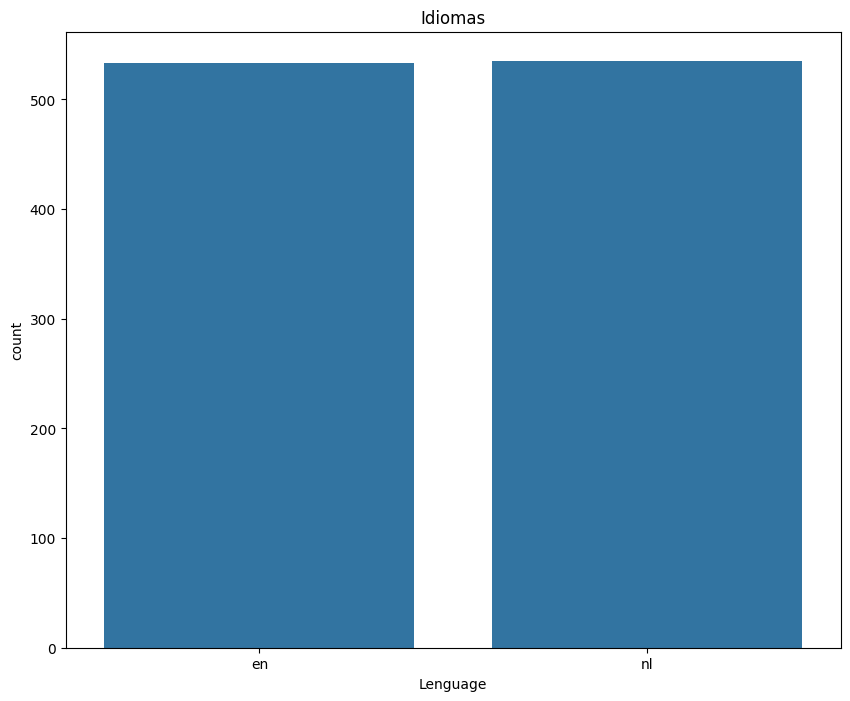

In [6]:
#Histograma del atributo clase
ax=plt.subplots(1,1,figsize=(10,8))

sns.countplot(x='Lenguage', data=df)  # Cambia 'Idiomas' por 'Lenguage'
plt.title("Idiomas")
plt.show()

In [ ]:
Palabras mas repetidas de cada lenguaje:

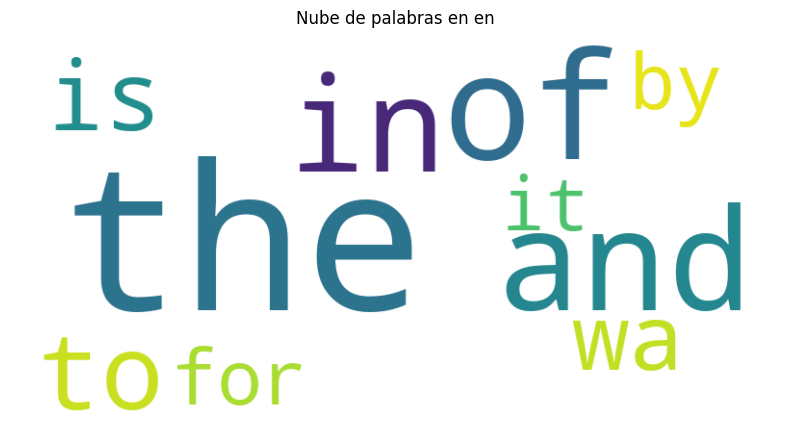

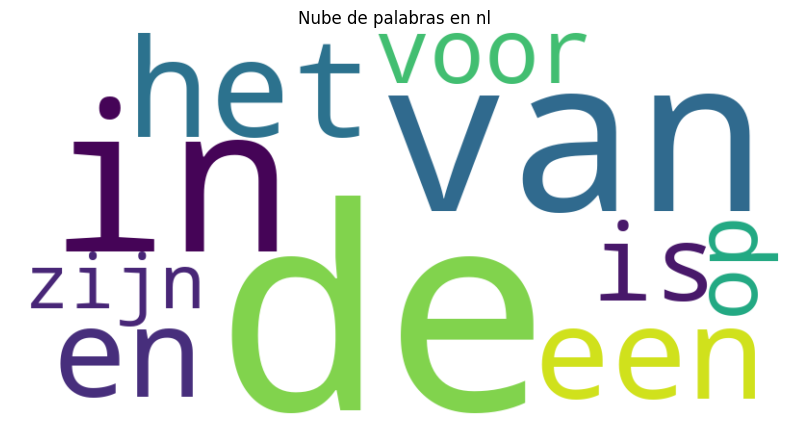

Palabras más frecuentes en en: ['the', 'of', 'and', 'in', 'to', 'is', 'wa', 'by', 'for', 'it']
Palabras más frecuentes en nl: ['de', 'van', 'in', 'het', 'een', 'en', 'is', 'voor', 'op', 'zijn']


In [7]:
# Función para obtener las palabras más frecuentes por idioma
def palabras_mas_frecuentes_idioma(df, idioma_seleccionado):
    textos_por_idioma = df[df['Lenguage'] == idioma_seleccionado]['texto_tokenizado']
    todas_las_palabras = [word for sublist in textos_por_idioma for word in eval(sublist)]  # Convertir la cadena a lista
    contador_palabras = Counter(todas_las_palabras)
    return contador_palabras.most_common(10)

# Función para crear y mostrar la nube de palabras por idioma
def mostrar_nube_palabras(idioma_seleccionado, palabras_frecuentes):
    # Verificar si hay palabras después del preprocesamiento
    if palabras_frecuentes:
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(palabras_frecuentes))
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Nube de palabras en {idioma_seleccionado}')
        plt.show()
    else:
        print(f"No hay palabras para generar la nube de palabras en {idioma_seleccionado}.")

# Crear y mostrar la nube de palabras para inglés
idioma_seleccionado_en = 'en'
palabras_frecuentes_en = palabras_mas_frecuentes_idioma(df, idioma_seleccionado_en)
mostrar_nube_palabras(idioma_seleccionado_en, palabras_frecuentes_en)

# Crear y mostrar la nube de palabras para neerlandés
idioma_seleccionado_nl = 'nl'
palabras_frecuentes_nl = palabras_mas_frecuentes_idioma(df, idioma_seleccionado_nl)
mostrar_nube_palabras(idioma_seleccionado_nl, palabras_frecuentes_nl)

# Obtener las palabras más frecuentes por idioma
def palabras_mas_frecuentes_por_idioma(df):
    palabras_frecuentes_por_idioma = {}
    for idioma in df['Lenguage'].unique():
        textos_por_idioma = df[df['Lenguage'] == idioma]['texto_tokenizado']
        todas_las_palabras = [word for sublist in textos_por_idioma for word in eval(sublist)]  # Convertir la cadena a lista
        contador_palabras = Counter(todas_las_palabras)
        palabras_frecuentes_por_idioma[idioma] = contador_palabras.most_common(10)
    return palabras_frecuentes_por_idioma

# Obtener las palabras más frecuentes para cada idioma
palabras_frecuentes_por_idioma = palabras_mas_frecuentes_por_idioma(df)

# Imprimir las palabras más frecuentes para cada idioma
for idioma, palabras_frecuentes in palabras_frecuentes_por_idioma.items():
    print(f"Palabras más frecuentes en {idioma}: {[word[0] for word in palabras_frecuentes]}")

In [ ]:
#para Redes neuronales se realizo el siguiente codigo

In [ ]:
Entrenamiento y pruebas:

In [8]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Lenguage'], test_size=0.2, random_state=42)

# Preprocesamiento adicional si es necesario (por ejemplo, vectorización de texto)
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Codificación de las etiquetas
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Construir y entrenar el modelo MLP con la configuración específica
mlp_classifier = MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    max_iter=200,
    momentum=0.9,
    random_state=42
)
mlp_classifier.fit(X_train_tfidf, y_train_encoded)

# Predicciones en el conjunto de prueba
y_pred = mlp_classifier.predict(X_test_tfidf)

# Evaluación del modelo
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test_encoded, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00       110

    accuracy                           1.00       214
   macro avg       1.00      1.00      1.00       214
weighted avg       1.00      1.00      1.00       214



In [10]:
# Predicciones en el conjunto de entrenamiento
y_train_pred = mlp_classifier.predict(X_train_tfidf)

# Evaluar el rendimiento en el conjunto de entrenamiento
train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
print(f'Accuracy en el conjunto de entrenamiento: {train_accuracy}')
print('Reporte de clasificación en el conjunto de entrenamiento:')
print(classification_report(y_train_encoded, y_train_pred))

# Predicciones en el conjunto de prueba
y_test_pred = mlp_classifier.predict(X_test_tfidf)

# Evaluar el rendimiento en el conjunto de prueba
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
print(f'Accuracy en el conjunto de prueba: {test_accuracy}')
print('Reporte de clasificación en el conjunto de prueba:')
print(classification_report(y_test_encoded, y_test_pred))


Accuracy en el conjunto de entrenamiento: 1.0
Reporte de clasificación en el conjunto de entrenamiento:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       429
           1       1.00      1.00      1.00       425

    accuracy                           1.00       854
   macro avg       1.00      1.00      1.00       854
weighted avg       1.00      1.00      1.00       854

Accuracy en el conjunto de prueba: 1.0
Reporte de clasificación en el conjunto de prueba:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00       110

    accuracy                           1.00       214
   macro avg       1.00      1.00      1.00       214
weighted avg       1.00      1.00      1.00       214



In [ ]:
#para Arboles de desicion y bosque ramdon se realizo el siguiente codigo

In [11]:
# hallando xtrain, xtext, ytrain, ytest

datos_X = df['texto_tokenizado']
datos_y = df['Lenguage']

print(datos_X.unique())
print(datos_y.unique())


X_train, X_test, y_train, y_test = train_test_split(
    datos_X,
    datos_y,
    test_size=0.80,
    random_state=42
)

["['and', 'africa', 'in', 'permission', 'winner', 'of', 'in', 'year', 'to', 'south', 'after', 'match', 'of', 'test']"
 "['president', 'tournament', 'wearing', 'presenting', 'were', 'met', 'africa', 'series', 'the', 'resumption', 'rugby', 'the', 'opening', 'match']"
 "['the', 'the', 'are', 'the', 'thirty', 'eight', 'reference', 'elli', 'garrard', 'in', 'to', 'fellow', 'referred', 'after', 'cup']"
 ...
 "['uiteindelijk', 'te', 'in', 'tot', 'individuele', 'zomerspelen', 'al', 'maar', 'beste', 'olympische', 'degen', 'koos', 'spelen', 'een']"
 "['degen', 'van', 'olympische', 'en', 'deze', 'van', 'schermen', 'de', 'zilveren', 'sportieve', 'olympische', 'zou', 'individuele', 'uitzondering', 'zijn']"
 "['alle', 'het', 'roeier', 'op', 'zomerspelen', 'zijn', 'berlijn', 'edities', 'in', 'het', 'zowel', 'van', 'uiteindelijk']"]
['en' 'nl']


In [15]:
vectorizer = CountVectorizer()
# Ajustar el vectorizador con los datos de entrenamiento
Xtrain = vectorizer.fit_transform(X_train)

# Transformar los datos de prueba utilizando el vectorizador ajustado
Xtest = vectorizer.transform(X_test)

print(Xtrain.shape)

print("Conjunto de entrenamiento - Características:", Xtrain.shape)
print("Conjunto de entrenamiento - Etiquetas:", y_train.shape)
print("Conjunto de prueba - Características:", Xtest.shape)
print("Conjunto de prueba - Etiquetas:", y_test.shape)

(213, 1539)
Conjunto de entrenamiento - Características: (213, 1539)
Conjunto de entrenamiento - Etiquetas: (213,)
Conjunto de prueba - Características: (855, 1539)
Conjunto de prueba - Etiquetas: (855,)


In [23]:
# implementacion de random forest

modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)

print("Dimensiones entreamiento :", Xtrain.shape)
print("Dimensiones prueba ", y_train.shape)

rf_Model = RandomForestClassifier()
cross_val_scores = cross_val_score(rf_Model, Xtrain, y_train, cv=2)
rf_Model.fit(Xtrain, y_train)
train_accuracy = rf_Model.score(Xtrain, y_train) * 100
test_accuracy = rf_Model.score(Xtest, y_test) * 100

Dimensiones entreamiento : (213, 1539)
Dimensiones prueba  (213,)


In [24]:
print("Precisión del entrenamiento:", "{:.3f}%".format(train_accuracy))
print("Precisión de prueba:", "{:.3f}%".format(test_accuracy))


print("Resultados de la validación cruzada:")
print(cross_val_scores)
print("Precisión media: {:.2f}".format(cross_val_scores.mean()))

Precisión del entrenamiento: 100.000%
Precisión de prueba: 99.532%
Resultados de la validación cruzada:
[0.99065421 0.99056604]
Precisión media: 0.99


In [25]:
# Crear el modelo de Random Forest
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)

print("Dimensiones entreamiento :", Xtrain.shape)
print("Dimensiones prueba ", y_train.shape)

# Número de árboles en el bosque aleatorio
n_estimators = [int(x) for x in np.linspace(start=150, stop=400, num=4)]
# Número de características a considerar en cada división
max_features = ['auto', 'sqrt']
# Número máximo de niveles en el árbol
max_depth = None,
# Número mínimo de muestras requeridas para dividir un nodo
min_samples_split = [5, 10]
# Número mínimo de muestras requeridas en cada nodo hoja
min_samples_leaf = [1, 2]

Dimensiones entreamiento : (213, 1539)
Dimensiones prueba  (213,)


In [26]:
# Método de selección de muestras para entrenar cada árbol
param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              }
print(param_grid)

rf_Grid = GridSearchCV(
    estimator=rf_Model, param_grid=param_grid, cv=2, verbose=2, n_jobs=4)
rf_Grid.fit(Xtrain, y_train)


train_accuracy = rf_Grid.score(Xtrain, y_train) * 100
test_accuracy = rf_Grid.score(Xtest, y_test) * 100
print("Precisión del entrenamiento:", "{:.3f}%".format(train_accuracy))
print("Precisión de prueba:", "{:.3f}%".format(test_accuracy))

{'n_estimators': [150, 233, 316, 400], 'max_features': ['auto', 'sqrt'], 'max_depth': (None,), 'min_samples_split': [5, 10], 'min_samples_leaf': [1, 2]}
Fitting 2 folds for each of 32 candidates, totalling 64 fits
Precisión del entrenamiento: 100.000%
Precisión de prueba: 99.415%


In [27]:
# Crear el modelo de Random Forest
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)

print("Dimensiones :", Xtrain.shape)
print("Dimensiones ", y_train.shape)


# Número de árboles en el bosque aleatorio
n_estimators = [int(x) for x in np.linspace(start=100, stop=150, num=3)]
# Número de características a considerar en cada división
max_features = ['sqrt', 'sqrt']
# Número máximo de niveles en el árbol
max_depth = [2, 4]
# Número mínimo de muestras requeridas para dividir un nodo
min_samples_split = [2, 5]
# Número mínimo de muestras requeridas en cada nodo hoja
min_samples_leaf = [1, 2]
param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
}

print(param_grid)

Dimensiones : (213, 1539)
Dimensiones  (213,)
{'n_estimators': [100, 125, 150], 'max_features': ['sqrt', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}


In [28]:
rf_Grid = GridSearchCV(
    estimator=rf_Model, param_grid=param_grid, cv=2, verbose=2, n_jobs=4)
rf_Grid.fit(Xtrain, y_train)

rf_Grid.best_params_
{'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 150}
# Evaluar el rendimiento del modelo en los datos de entrenamiento y prueba
train_accuracy = rf_Grid.score(Xtrain, y_train) * 100
test_accuracy = rf_Grid.score(Xtest, y_test) * 100
print("Precisión del entrenamiento:", "{:.3f}%".format(train_accuracy))
print("Precisión de prueba:", "{:.3f}%".format(test_accuracy))


param_sets = [
    {'n_estimators': 30, 'min_samples_split': 15,
        'min_samples_leaf': 15, 'max_depth': 28, 'max_features': 'sqrt'},
]

Fitting 2 folds for each of 48 candidates, totalling 96 fits
Precisión del entrenamiento: 99.531%
Precisión de prueba: 99.298%


Número de prueba: 1
Parámetros: {'n_estimators': 30, 'min_samples_split': 15, 'min_samples_leaf': 15, 'max_depth': 28, 'max_features': 'sqrt'}
Precisión de entrenamiento: 90.61%
Precisión de prueba: 91.35%
Tiempo de ejecución : 0.05 segundos
--------------------------------------
Precisión en el conjunto de prueba: 0.9309941520467836

Informe de clasificación:
              precision    recall  f1-score   support

          en       0.94      0.92      0.93       428
          nl       0.92      0.95      0.93       427

    accuracy                           0.93       855
   macro avg       0.93      0.93      0.93       855
weighted avg       0.93      0.93      0.93       855



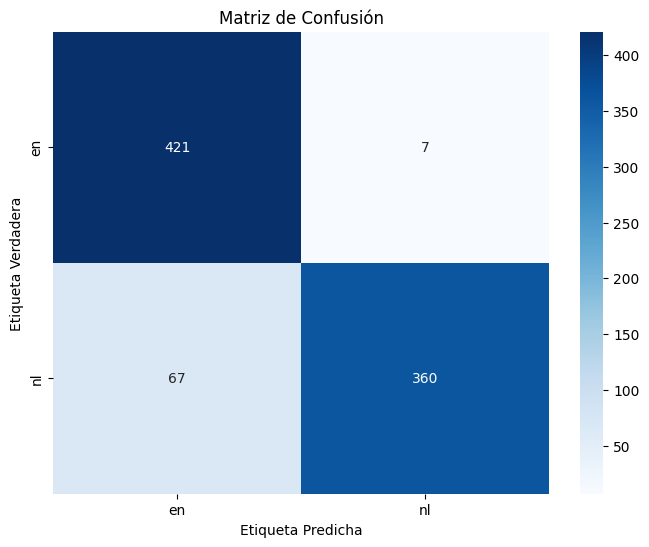

In [35]:
for i, params in enumerate(param_sets):
    start_time = time.time()  # Registrar el tiempo de inicio

    # Crear una instancia del modelo RandomForestClassifier
    modelo_rf = RandomForestClassifier(**params)

    # Entrenar el modelo con los parámetros actuales

    modelo_rf.fit(Xtrain, y_train)

    # Evaluar el rendimiento del modelo (por ejemplo, calcular la precisión)
    train_accuracy = modelo_rf.score(Xtrain, y_train) * 100
    test_accuracy = modelo_rf.score(Xtest, y_test) * 100

    end_time = time.time()  # Registrar el tiempo de finalización
    elapsed_time = end_time - start_time  # Calcular el tiempo transcurrido

    # Redondear el tiempo transcurrido a dos decimales
    elapsed_time = round(elapsed_time, 2)

    # Imprimir los resultados con el número de prueba, tiempo de ejecución y precisión en %
    print("Número de prueba:", i+1)
    print("Parámetros:", params)
    print("Precisión de entrenamiento:", "{:.2f}%".format(train_accuracy))
    print("Precisión de prueba:", "{:.2f}%".format(test_accuracy))
    print("Tiempo de ejecución :", elapsed_time, "segundos")
    print("--------------------------------------")

    # === Arboles de decision ===

    # Entrenar el clasificador de árboles de decisión
    clf = DecisionTreeClassifier()
    clf.fit(Xtrain,y_train)

    # Realizar predicciones en el conjunto de prueba
    predictions = clf.predict(Xtest)

    # Evaluar el rendimiento del clasificador
    accuracy = accuracy_score(y_test, predictions)
    print(f'Precisión en el conjunto de prueba: {accuracy}')

    # Mostrar el informe de clasificación
    print('\nInforme de clasificación:')
    print(classification_report(y_test, predictions))

    # === ******************* ===

    # Calcular la matriz de confusión
    y_pred = modelo_rf.predict(Xtest)
    cm = confusion_matrix(y_test, y_pred)

    labels = np.unique(y_test)
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='d')
    plt.title("Matriz de Confusión")
    plt.xlabel("Etiqueta Predicha")
    plt.ylabel("Etiqueta Verdadera")
    plt.show()